# Inflation and Unemployment Data

This Notebook constructs the data file used in the `Delta Method Examples.ipynb` Notebook. Output is saved to `data/inflation_unemployment_data.csv`

In [1]:
import fredpy as fp
import pandas as pd
import matplotlib.pyplot as plt

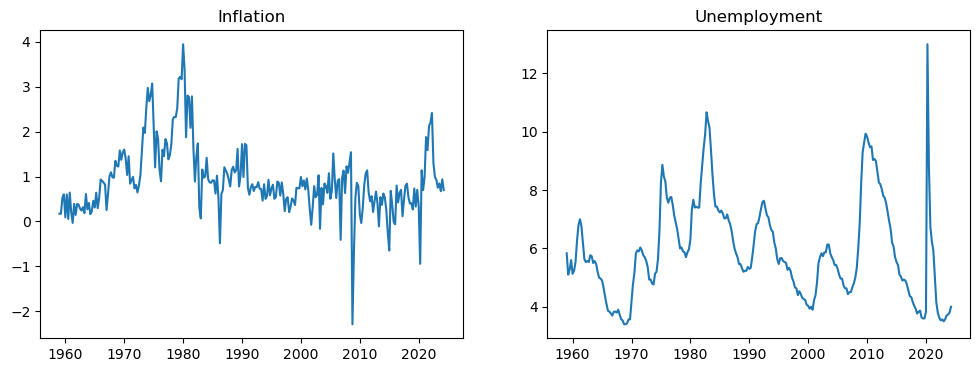

In [2]:
# Download CPI data and set frequency to quarterly
cpi = fp.series('CPIAUCSL').as_frequency('Q')

# Inflation is the percent change in the CPI
inflation = cpi.pc(annualized=False)

# Download unemployment rate data and set frequency to quarterly
unemployment = fp.series('UNRATE').as_frequency('Q')

# Merge inflation and unemployment data into a single DataFrame, name columns
df = pd.concat((inflation.data,unemployment.data),axis=1)
df.columns = ('inflation','unemployment')

# Remove observations before 1959
df = df.loc['1959':]

# Plot data
fig,axes = plt.subplots(1,2,figsize=(12,4))
axes[0].plot(df['inflation'])
axes[0].set_title('Inflation')

axes[1].plot(df['unemployment'])
axes[1].set_title('Unemployment');

# Reset and name index
df = df.reset_index()
df.index.name = 'Index'

In [3]:
# Save data to csv file
df.to_csv('Inflation_Unemployment_Data.csv')